## Reading Raster Files with Python


### GDAL

GDAL (Geospatial Data Abstraction Library) is an open-source library for working with geospatial data in different formats, such as raster and vector data. It provides a set of tools and utilities for reading, writing, and manipulating geospatial data, and is widely used in many geospatial software applications.

The GDAL library includes support for many common raster and vector data formats.

GDAL can be used with many programming languages, including Python, C++, Java, and others. In Python, the GDAL library can be accessed through the "gdal" module.

https://gdal.org/

We will not use the gdal binding in this lesson, instead we use rasterio.


### Rasterio

Rasterio is a Python library for working with geospatial raster data. It provides a simple and efficient way to read and write raster data in different formats, and to manipulate and analyze it using Python.

Rasterio is built on top of the GDAL library, which is a powerful and widely used open-source library for working with geospatial data. However, Rasterio provides a more user-friendly and Pythonic interface than GDAL, making it easier for Python developers to work with raster data.

https://rasterio.readthedocs.io/en/stable/

In [1]:
import rasterio
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np

### Reading Raster Data (RGB Image)

In [2]:
dataset = rasterio.open('geodata/bluemarble_small.jpg')

#### Dataset Attributes

To get the most important dataset attributes we can use meta:

In [3]:
dataset.meta

{'driver': 'JPEG',
 'dtype': 'uint8',
 'nodata': None,
 'width': 2048,
 'height': 1024,
 'count': 3,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.17578125, 0.0, -180.0,
        0.0, -0.17578125, 90.0)}

We can also access the same and other attributes by directly calling them from dataset:

In [4]:
dataset.name

'geodata/bluemarble_small.jpg'

In [5]:
dataset.mode

'r'

In [6]:
dataset.count

3

In [7]:
dataset.indexes

(1, 2, 3)

In [8]:
dataset.width

2048

In [9]:
dataset.height

1024

In [10]:
dataset.nodatavals 

(None, None, None)

In [11]:
dataset.crs

CRS.from_epsg(4326)

In [12]:
dataset.transform 

Affine(0.17578125, 0.0, -180.0,
       0.0, -0.17578125, 90.0)

In [13]:
~dataset.transform

Affine(5.688888888888889, 0.0, 1024.0,
       0.0, -5.688888888888889, 512.0)

In [14]:
dataset.bounds

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)

In [15]:
print(dataset.bounds.left)
print(dataset.bounds.bottom)
print(dataset.bounds.right)
print(dataset.bounds.top)

-180.0
-90.0
180.0
90.0


In [16]:
dataset.transform * (0, 0)  # Transformation Pixel(0,0)

(-180.0, 90.0)

In [17]:
~dataset.transform * (0, 0) # Inverse Transformation WGS84(0,0)

(1024.0, 512.0)

In [18]:
~dataset.transform * (8.539434, 47.378109)

(1072.5798912, 242.4712021333333)

In [19]:
px,py = ~dataset.transform * (8.539434, 47.378109)
print(px,py)

1072.5798912 242.4712021333333


#### Reading Bands

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Datatypes of bands:

In [20]:
dataset.dtypes

('uint8', 'uint8', 'uint8')

In [21]:
dataset = rasterio.open("geodata/bluemarble_small.jpg")

r = dataset.read(1)
g = dataset.read(2)
b = dataset.read(3)

# scaled:
#r = dataset.read(1, out_shape=(100,200))
#g = dataset.read(2, out_shape=(100,200))
#b = dataset.read(3, out_shape=(100,200))

In [25]:
rgb = np.dstack((r,g,b))  # create (r,g,b) tuples for each pixel

#### Displaying using Matplotlib

Interpolations:
    
https://matplotlib.org/3.3.1/gallery/images_contours_and_fields/interpolation_methods.html

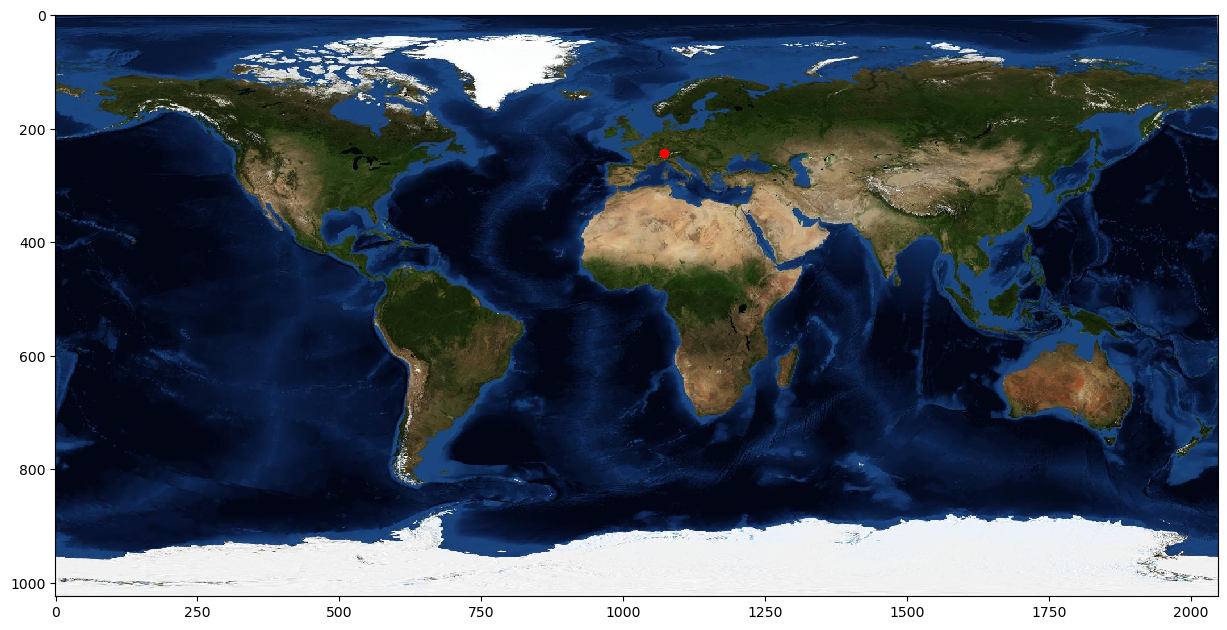

In [27]:
fig, ax = plt.subplots(figsize=(15,9))
ax.imshow(rgb, interpolation='nearest')
ax.plot(px,py, 'ro');

#### Display using rasterio.plot

It is also possible to directly plot the dataset, without calling read

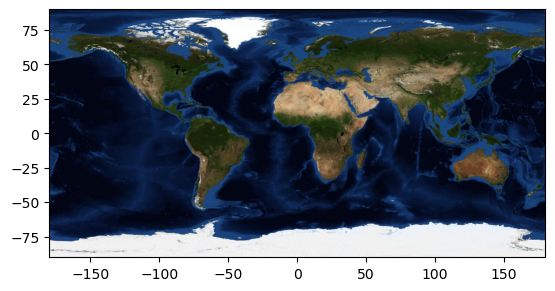

In [28]:
import rasterio.plot

rasterio.plot.show(dataset);

In [29]:
dataset.close()

#### Windowed read

In [30]:
import rasterio 
from rasterio.windows import Window

dataset = rasterio.open('geodata/bluemarble_small.jpg')

In [31]:
w = Window(0,0,512,512)   # x,y,width,height

r = dataset.read(1, window=w)
g = dataset.read(2, window=w)
b = dataset.read(3, window=w)

In [32]:
rgb = np.dstack((r,g,b))

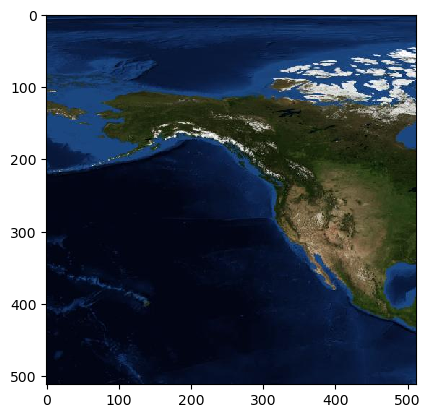

In [33]:
fig, ax = plt.subplots()
ax.imshow(rgb, interpolation='nearest');

In [34]:
dataset.close()

#### List Pyramids/Overlays

In [35]:
dataset = rasterio.open("geodata/bluemarble.vrt")

In [36]:
dataset.indexes

(1, 2, 3)

In [37]:
for band in dataset.indexes:
    print(dataset.overviews(band))

[2, 4, 8, 16, 32]
[2, 4, 8, 16, 32]
[2, 4, 8, 16, 32]


### Reading Raster Data (Elevation Data)

Reading elevation (or any other) data in raster is as simple as reading RGB values.
The number of bands is reduced to 1 and the 



#### Memory intense reading

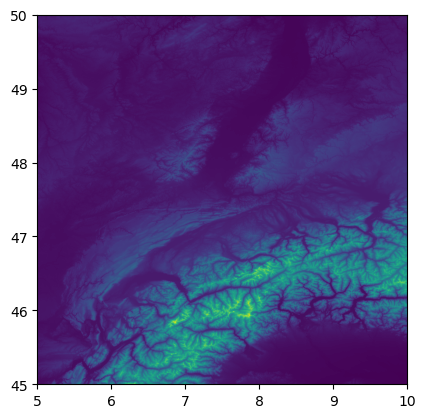

In [38]:
import rasterio.plot

dataset = rasterio.open('geodata/srtm_38_03.tif')
rasterio.plot.show(dataset);

In [39]:
dataset.nodatavals

(-32768.0,)

In [40]:
elevation = dataset.read(1)

In [41]:
elevation

array([[422, 422, 421, ..., 280, 281, 283],
       [418, 417, 415, ..., 277, 279, 280],
       [415, 412, 411, ..., 271, 274, 276],
       ...,
       [174, 174, 175, ...,  38,  40,  39],
       [173, 174, 175, ...,  39,  36,  37],
       [174, 175, 174, ...,  36,  38,  36]], dtype=int16)

let's get the maximum elevation value

In [42]:
np.max(elevation)

4783

In [43]:
# where is max ?
np.unravel_index(np.argmax(elevation), elevation.shape) # y is first then x

(5000, 2237)

Text(2337, 5050, '4783')

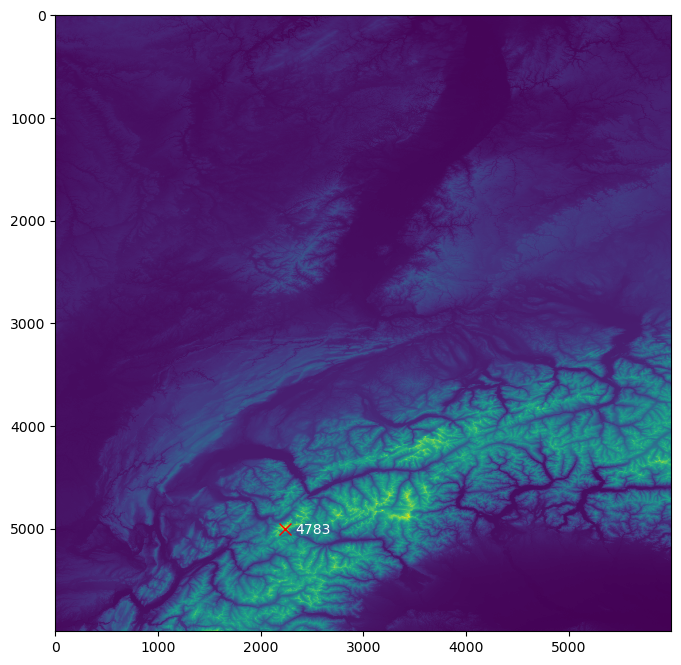

In [44]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(elevation, interpolation='nearest')
py,px = np.unravel_index(np.argmax(elevation), elevation.shape)
ax.plot(px,py, 'rx', ms=8);
ax.text(px+100,py+50,str(np.max(elevation)), color="white")

In [45]:
dataset.transform * (px, py) # -> Mont Blanc ~4810m

(6.864166666666667, 45.833333333333336)

In [46]:
dataset.close()

#### Using less memory: blockwise reading

If we have a very large dataset we may not have enough memory to load the entire dataset.

In this case we read blockwise. For example 128x128 blocks or 512x512 blocks or whatever fits into memory.
We can then do our operations on the smaller part.

Let's calculate the maximum elevation blockwise for example:


In [47]:
dataset = rasterio.open('geodata/srtm_38_03.tif')

In [48]:
%%timeit -n1 -r1

maxelv_total = 0
px = 0
py = 0

xBSize = 512
yBSize = 512   

for i in range(0, dataset.height, yBSize):
    if i + yBSize < dataset.height:
        numRows = yBSize
    else:
        numRows = dataset.height - i
    
    for j in range(0, dataset.width, xBSize):
        if j + xBSize < dataset.width:
            numCols = xBSize
        else:
            numCols = dataset.width - j
            
        w = Window(j,i,numCols,numRows)
        elevation = dataset.read(1, window=w)
        
        maxelevation = np.max(elevation) # max from block
        maxelv_total = max(maxelv_total, maxelevation)
        
print(maxelv_total)

4783
99.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
dataset.close()